In [1]:
import pickle
from pathlib import Path

import numpy as np
from IPython.display import Javascript
import matplotlib.pyplot as plt

from log_prob import log_prob

In [12]:
fname = "options.pickle"
with open(fname, "rb") as fb:
    options = pickle.load(fb)

ndim = 7

# param0 = 10 ** ((np.random.rand() - 0.5) * 4)
# param1 = np.random.rand(ndim - 3, 1)
# param2 = (np.random.rand() + 0.5) / 100
# param3 = (np.random.rand() - 0.5)
# p0 = np.vstack((param0, param1, param2, param3)).T[0]

# original
p0 = [7.0, 0.730, 0.558, 0.017, 0.625, 0.008, 0.050]

# issue: observed and simulated scattered radial profile grids are not equal
#p0 = [2.926e+01, 8.972e-01, 2.726e-01, 1.425e-01, 4.986e-01, 7.306e-03, 3.156e-01]

p0

[7.0, 0.73, 0.558, 0.017, 0.625, 0.008, 0.05]

In [ ]:
prob, blob = log_prob(p0, options, debugging=True)
print(prob)
Javascript("new Notification('Cell Execution Has Finished')")

/home/moon/birnstiel/CODES/IMLup_SPHERE_fit/helper_functions.py:63: UserWarning: Disk mass is unreasonably high: M_disk / Mstar = 0.3
  warnings.warn(f'Disk mass is unreasonably high: M_disk / Mstar = {d.mass/mstar:.2g}')


# Debugging

In [14]:
temp_path = Path(f'runs/run_{blob}')

In [15]:
RMS_jyb = options['RMS_jyb']

read the debugging dict

In [16]:
with open(temp_path.with_suffix('.pickle'), 'rb') as fh:
    info = pickle.load(fh)

iq_mm_obs = info['iq_mm_obs']
iq_sca_obs = info['iq_sca_obs']
iq_mm_sim = info['iq_mm_sim']
iq_sca_sim = info['iq_sca_sim']

**Plot mm - images**

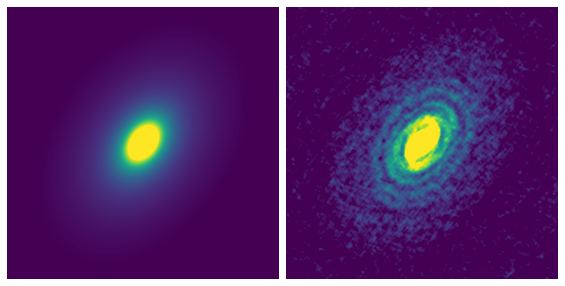

In [17]:
im_cgs_sim = iq_mm_sim.data * iq_mm_sim.pix_per_beam / iq_mm_sim.beamarea_str * 1e-23
im_cgs_obs = iq_mm_obs.data / iq_mm_sim.beamarea_str * 1e-23

f, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
vmin = RMS_jyb * 1e-23 / iq_mm_obs.beamarea_str # the RMS from dsharp (Jy/beam) to CGS conversion
vmax = 20 * vmin
ax[0].imshow(im_cgs_sim, extent=iq_mm_sim.extent, vmin=vmin, vmax=vmax, origin='lower')
ax[1].imshow(im_cgs_obs, extent=iq_mm_obs.extent, vmin=vmin, vmax=vmax, origin='lower')
ax[0].set_xlim([2, -2])
ax[0].set_ylim([-2, 2]);

ax[0].axis('off')
ax[1].axis('off')
f.subplots_adjust(wspace=0)
# f.savefig('mm.pdf', transparent=True, bbox_inches='tight')

**Plot IR - images**

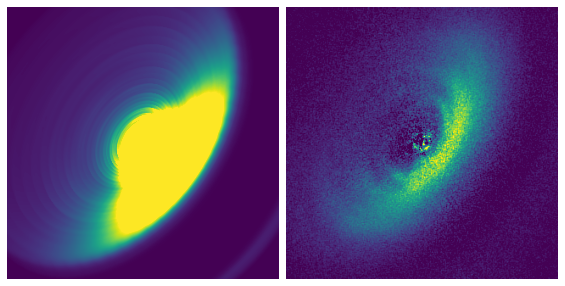

In [18]:
f, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)
vmax = np.median(iq_sca_sim.data)*2e1
ax[0].imshow(iq_sca_sim.data, extent=iq_sca_sim.extent, vmin=vmax/1e2, vmax=vmax, origin='lower')
vmax = np.median(iq_sca_obs.data)*2e1
ax[1].imshow(iq_sca_obs.data, extent=iq_sca_obs.extent, vmin=vmax/1e2, vmax=vmax, origin='lower')
ax[0].set_xlim([2, -2])
ax[0].set_ylim([-2, 2])

ax[0].axis('off')
ax[1].axis('off')
f.subplots_adjust(wspace=0)
# f.savefig('sca.pdf', transparent=True, bbox_inches='tight')

**Plot the profiles**

In [19]:
x_mm_sim = info['x_mm_sim']
y_mm_sim = info['y_mm_sim']
dy_mm_sim = info['dy_mm_sim']

profiles = info['profiles_sca_sim']
profiles_obs = info['profiles_sca_obs']

In [20]:
disk_surface = dict(inc=options['inc'], PA=options['PA'], z0=options['z0'], psi=options['psi'])

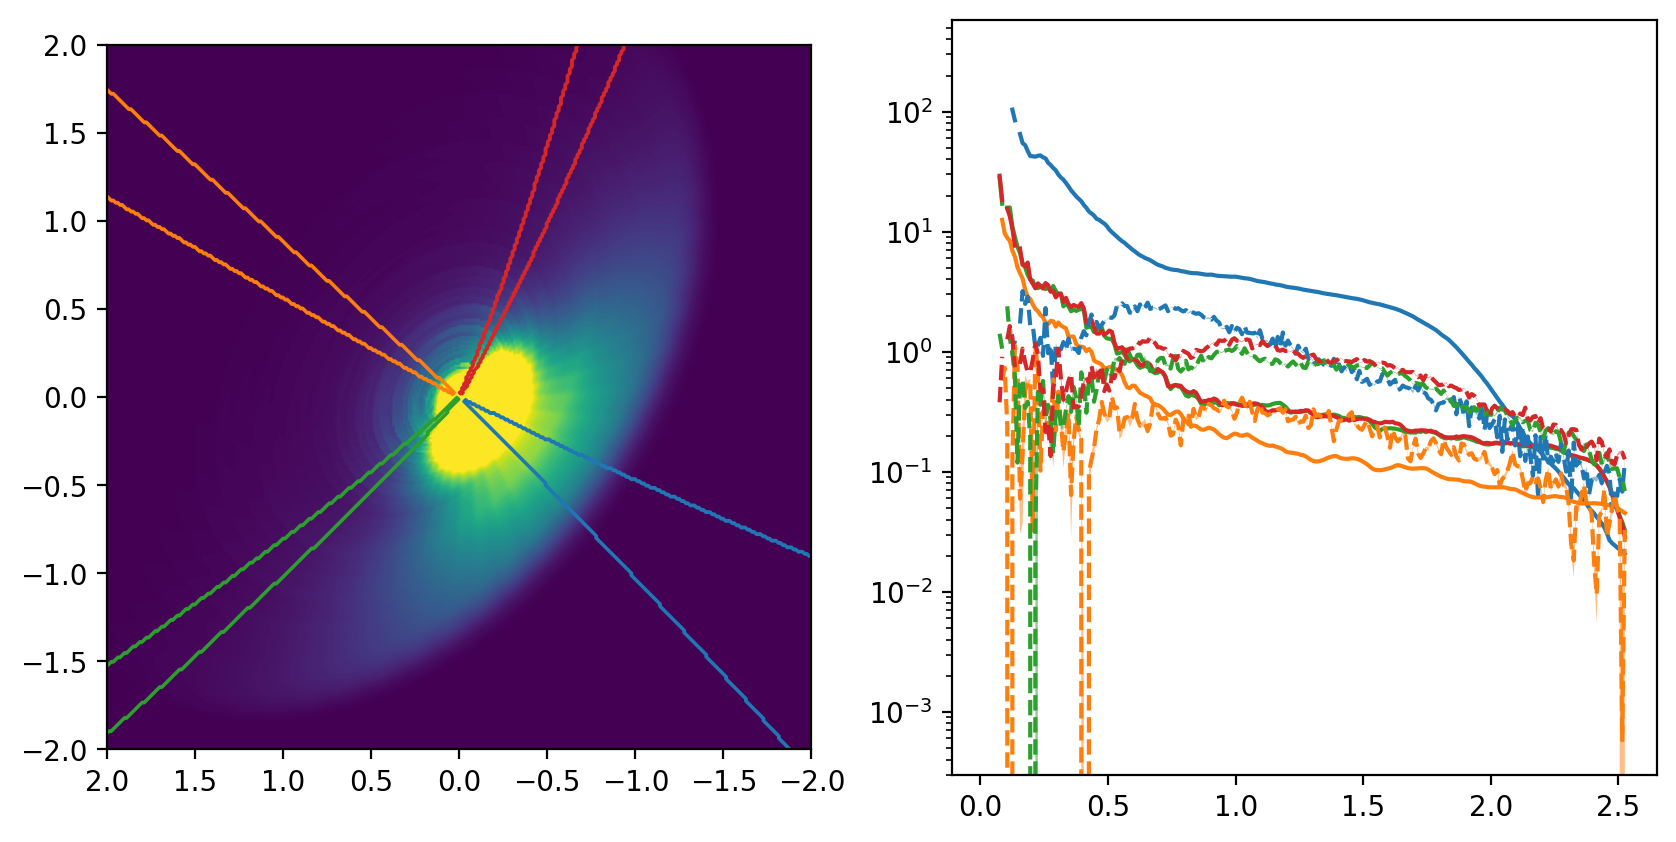

In [21]:
norm = profiles['B']['norm']

data = iq_sca_sim.data.copy()
if iq_sca_sim.bunit.lower() == 'jy/beam':
    data *= 1e-23 / iq_sca_sim.beamarea_str
elif iq_sca_sim.bunit.lower() == 'jy/pixel':
    data *= 1e-23 * iq_sca_sim.pix_per_beam / iq_sca_sim.beamarea_str

f, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=200)
ax[0].imshow(data / norm, extent=iq_sca_sim.extent, vmin=0.1, vmax=5, origin='lower')

# simulated (+masks)

for i, key in enumerate(profiles.keys()):
    profile = profiles[key]
    x = profile['x']
    y = profile['y']
    dy = profile['dy']
    mask = profile['mask']

    iq_sca_sim.plot_mask(ax=ax[0], **disk_surface, **mask, mask_alpha=0, mask_color=f'C{i}')
    
    ax[1].semilogy(x, y, c=f'C{i}')
    ax[1].fill_between(x, y - dy, y + dy, fc=f'C{i}', alpha=0.5)
    
# observed
    
norm = profiles_obs['B']['norm']
for i, key in enumerate(profiles_obs.keys()):
    profile = profiles_obs[key]
    x = profile['x']
    y = profile['y']
    dy = profile['dy']
    mask = profile['mask']

    ax[1].semilogy(x, y, f'C{i}--')
    ax[1].fill_between(x, y - dy, y + dy, fc=f'C{i}', alpha=0.5)
    

ax[0].set_xlim([2, -2])
ax[0].set_ylim([-2, 2]);